#####  2. Com os dados "Avaliação de Carros"

In [274]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\marinalb1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



# Ignorar os warnings
warnings.filterwarnings("ignore")

# Abrir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# Abrir todas as linhas do DataFrame
pd.set_option('display.max_rows', None)


In [276]:
# Retirado da biblioteca do Dataframe
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets

In [277]:
significado = pd.DataFrame(car_evaluation.variables)
significado

,name,role,type,demographic,description,units,missing_values
0,buying,Feature,Categorical,None,buying price,None,no
1,maint,Feature,Categorical,None,price of the maintenance,None,no
2,doors,Feature,Categorical,None,number of doors,None,no
3,persons,Feature,Categorical,None,capacity in terms of persons to carry,None,no
4,lug_boot,Feature,Categorical,None,the size of luggage boot,None,no
5,safety,Feature,Categorical,None,estimated safety of the car,None,no
6,class,Target,Categorical,None,"evaulation level (unacceptable, acceptable, go...",None,no


In [278]:
# Crie um DataFrame com os dados
df =  pd.read_excel("C:/Users/marinalb1/Desktop/Marina Pessoal/Volvo/Car_Evaluation/car_data.xlsx") 

# Mudando os valores textuais
df[['buying', 'maint','lug_boot','safety','class']] = df[['buying', 'maint','lug_boot','safety','class']].apply(lambda x: x.str.capitalize())

In [279]:
colunas = df.columns
for coluna in colunas:
    print(coluna, df[coluna].unique())

buying ['Vhigh' 'High' 'Med' 'Low']
maint ['Vhigh' 'High' 'Med' 'Low']
doors [2 3 4 '5more']
persons [2 4 'more']
lug_boot ['Small' 'Med' 'Big']
safety ['Low' 'Med' 'High']
class ['Unacc' 'Acc' 'Vgood' 'Good']


##### a. Forneça algumas percepções sobre os dados, como forma, distribuição e comparações entre categorias (exploração de dados)

In [280]:
colunas = df.columns
for coluna in colunas:
    contagem = df.groupby(coluna)['class'].count()
    print(contagem)

buying
High     432
Low      432
Med      432
Vhigh    432
Name: class, dtype: int64
maint
High     432
Low      432
Med      432
Vhigh    432
Name: class, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: class, dtype: int64
persons
2       576
4       576
more    576
Name: class, dtype: int64
lug_boot
Big      576
Med      576
Small    576
Name: class, dtype: int64
safety
High    576
Low     576
Med     576
Name: class, dtype: int64
class
Acc       384
Good       69
Unacc    1210
Vgood      65
Name: class, dtype: int64


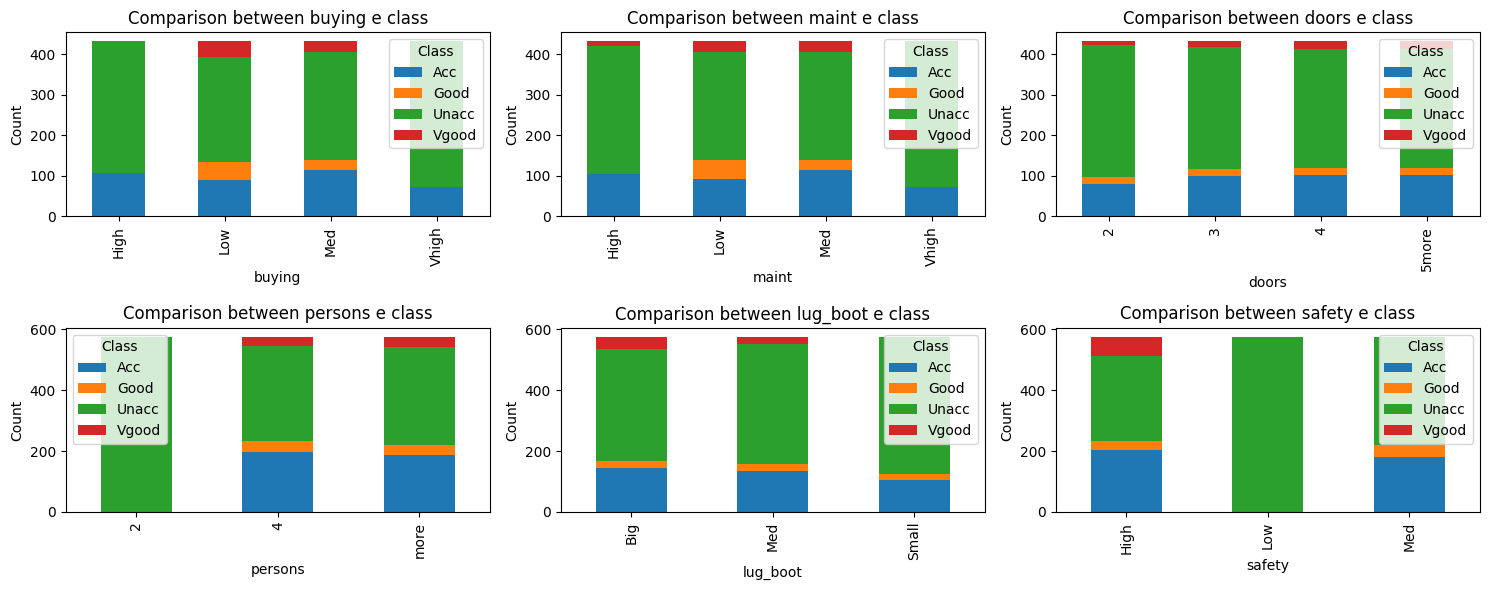

In [281]:
# Plotando os gráficos em duas linhas e três colunas
colunas = df.columns[:-1]  # Exclui a coluna 'classe'
num_cols = len(colunas)
num_linhas = 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 6))

for i, coluna in enumerate(colunas):
    linha = i // num_colunas
    coluna_atual = i % num_colunas
    df_temp = df.groupby([coluna, 'class']).size().unstack()
    df_temp.plot(kind='bar', stacked=True, ax=axs[linha, coluna_atual])
    axs[linha, coluna_atual].set_title(f'Comparison between {coluna} e class')
    axs[linha, coluna_atual].set_xlabel(coluna)
    axs[linha, coluna_atual].set_ylabel('Count')
    axs[linha, coluna_atual].legend(title='Class')

# Remover eixos vazios
for i in range(num_cols, num_linhas * num_colunas):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

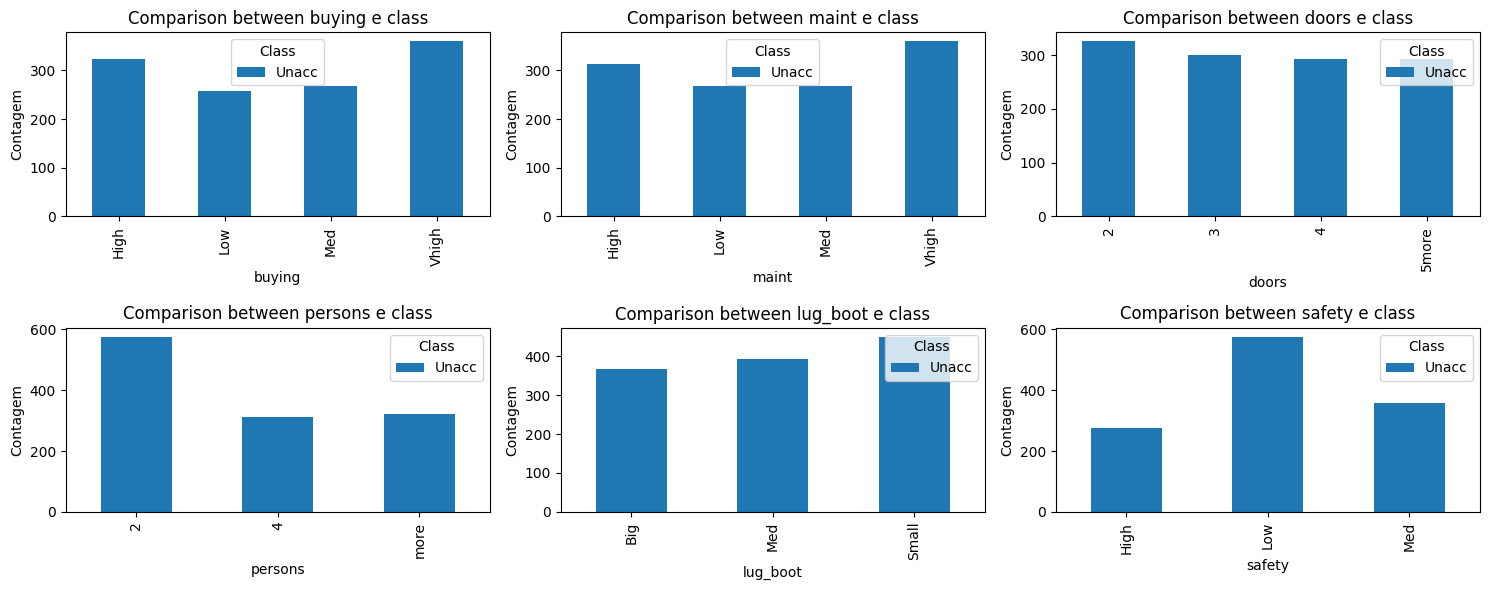

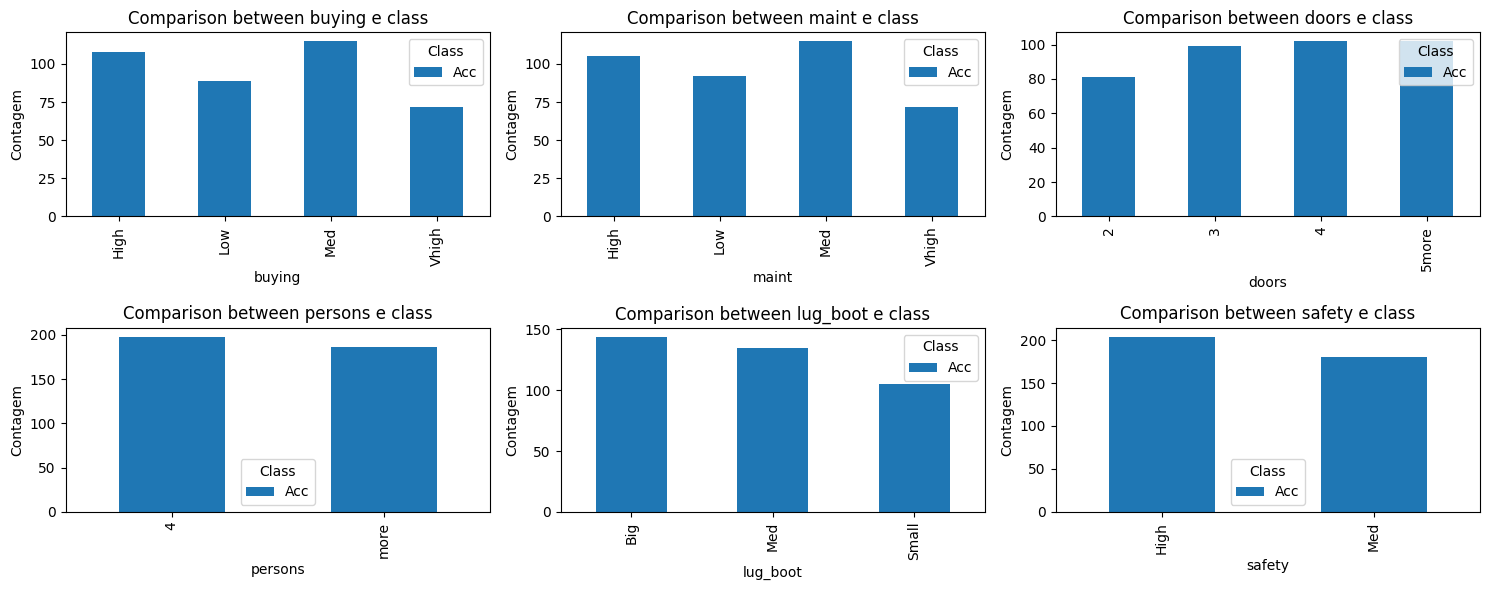

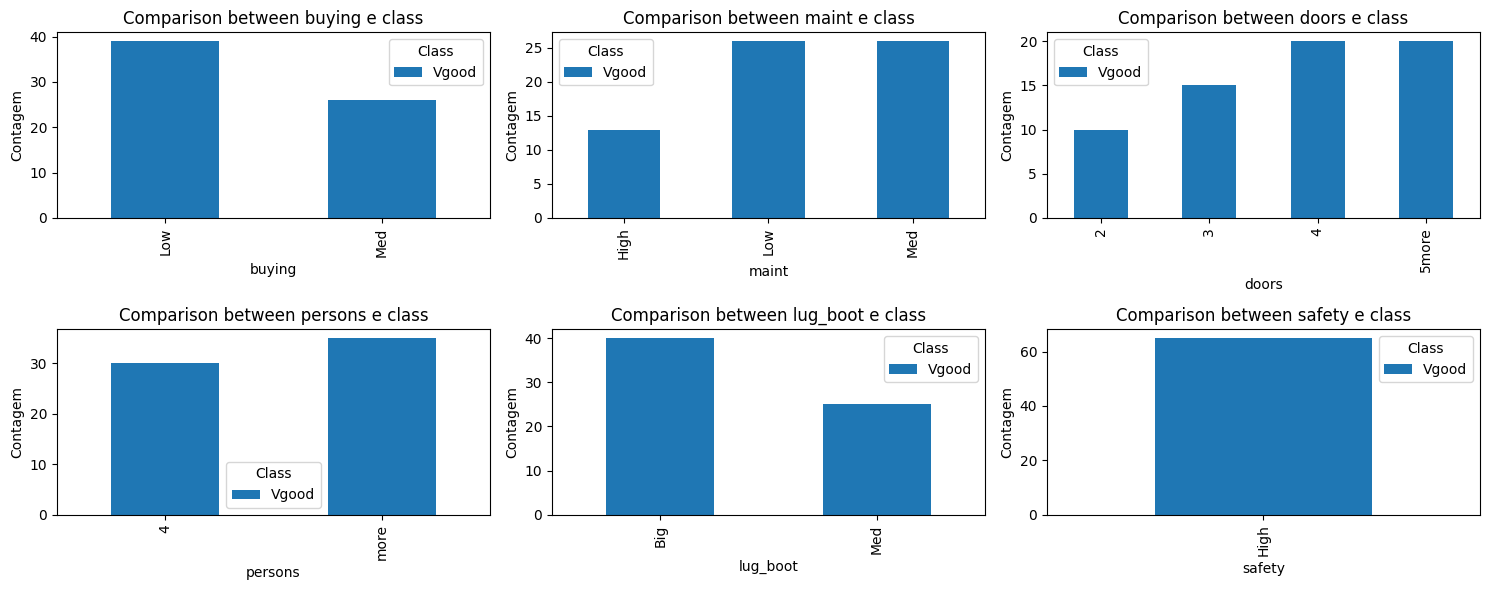

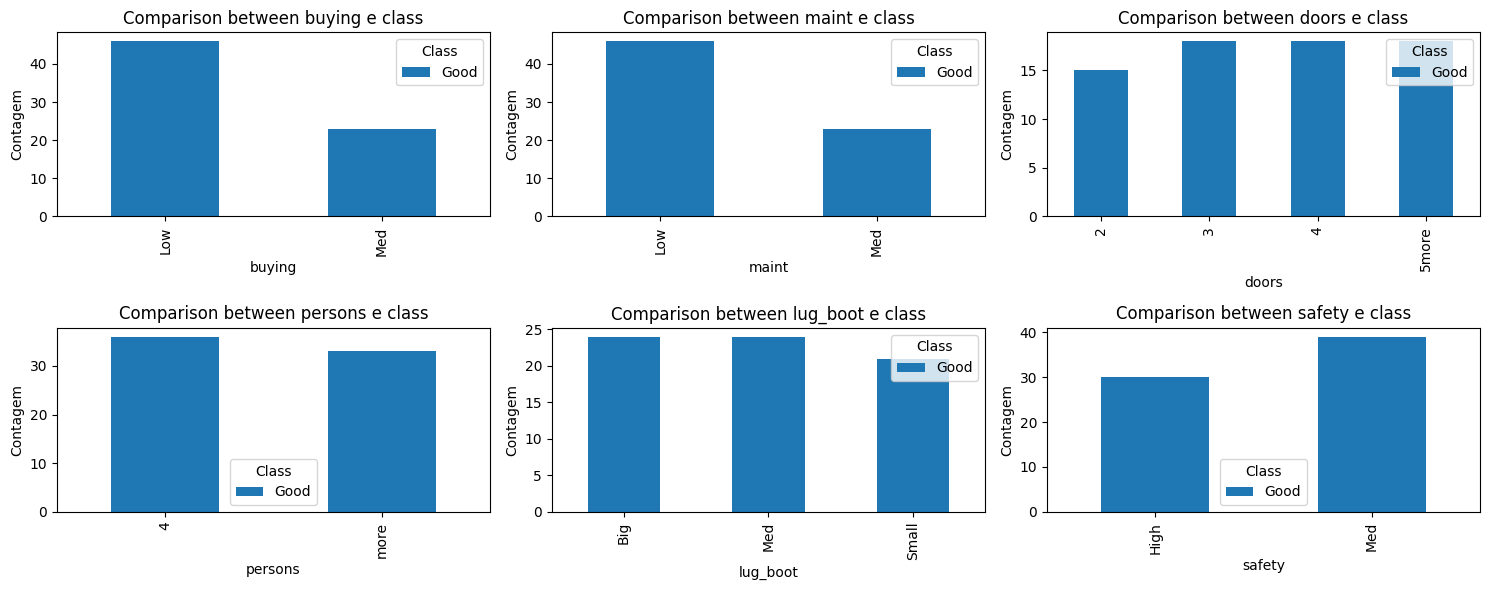

In [282]:
valores = df['class'].unique()
for valor in valores:
    df_acc = df[df['class'] == valor]
    # Plotando os gráficos em duas linhas e três colunas
    colunas = df_acc.columns[:-1]  # Exclui a coluna 'class'
    num_cols = len(colunas)
    num_linhas = 2
    num_colunas = 3

    fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 6))

    for i, coluna in enumerate(colunas):
        linha = i // num_colunas
        coluna_atual = i % num_colunas
        df_temp = df_acc.groupby([coluna, 'class']).size().unstack()
        df_temp.plot(kind='bar', stacked=True, ax=axs[linha, coluna_atual])
        axs[linha, coluna_atual].set_title(f'Comparison between {coluna} e class')
        axs[linha, coluna_atual].set_xlabel(coluna)
        axs[linha, coluna_atual].set_ylabel('Contagem')
        axs[linha, coluna_atual].legend(title='Class')

    # Remover eixos vazios
    for i in range(num_cols, num_linhas * num_colunas):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()

##### b. Dados os modelos de Regressão Logística, Classificador de Floresta Aleatória e Árvore de Decisão, qual modelo se sai melhor ao prever a classe do carro? Justifique sua resposta com dados.

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import  plot_tree

In [ ]:
# Aplicar LabelEncoder apenas na coluna 'class' para encontrar o mapeamento
class_encoder = LabelEncoder()
class_encoder.fit(df['class'])
class_mapping = class_encoder.classes_
class_mapping_dict = {i: class_mapping[i] for i in range(len(class_mapping))}
class_mapping_dict

{0: 'Acc', 1: 'Good', 2: 'Unacc', 3: 'Vgood'}

In [287]:
# Aplica LabelEncoder para transformar todas as colunas do DataFrame.
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].astype(str))  # Converte para string antes da codificação


# Divisão dos dados em características (X) e alvo (y)
X = df.drop('class', axis=1)
y = df['class']

Regressão Logística

In [220]:
# Divisão dos dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 30% dos dados para teste

# Construção e treinamento do modelo de Regressão Logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred = logistic_model.predict(X_test)

# Avaliação do modelo
accuracy_rl = accuracy_score(y_test, y_pred)
report_rl = classification_report(y_test, y_pred)

print("Acuracia Regressão Logisitica:", accuracy_rl)
print(report_rl)

Acuracia Regressão Logisitica: 0.6647398843930635
              precision    recall  f1-score   support

           0       0.30      0.18      0.22       118
           1       0.00      0.00      0.00        19
           2       0.73      0.90      0.81       358
           3       0.14      0.04      0.06        24

    accuracy                           0.66       519
   macro avg       0.29      0.28      0.27       519
weighted avg       0.58      0.66      0.61       519



Floresta Aleatória

In [221]:
# Divisão dos dados em conjunto de treino e teste novamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construção e treinamento do modelo de Floresta Aleatória
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred_rf = random_forest_model.predict(X_test)

# Avaliação do modelo de Floresta Aleatória
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Acuracia Floresta Aleatória:", accuracy_rf)
print(report_rf)


Acuracia Floresta Aleatória: 0.9672447013487476
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       118
           1       0.71      0.89      0.79        19
           2       1.00      0.99      0.99       358
           3       0.95      0.88      0.91        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.97      0.97      0.97       519



Árvore de Decisão

In [222]:
# Construção e treinamento do modelo de Árvore de Decisão
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred_dt = decision_tree_model.predict(X_test)

# Avaliação do modelo de Árvore de Decisão
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Acuracia Arvore de Decisao:", accuracy_dt)
print(report_dt)

Acuracia Arvore de Decisao: 0.9710982658959537
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.75      0.95      0.84        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519



Conclusão: Entre os três modelos, a Árvore de Decisão e o Classificador de Floresta Aleatória apresentam um desempenho significativamente melhor do que a Regressão Logística. Entre eles, a Árvore de Decisão tem uma leve vantagem em termos de acurácia e um recall ligeiramente melhor para a classe 1 ('good'). No entanto, a diferença entre a Árvore de Decisão e a Floresta Aleatória é pequena, sugerindo que ambos são modelos altamente eficazes para este conjunto de dados. A escolha entre eles pode depender de outros fatores, como a complexidade do modelo e a velocidade de predição, mas, estritamente com base no desempenho de classificação, a Árvore de Decisão tem uma vantagem marginal.

##### c. Classifique a importância dos recursos em relação ao Modelo de Floresta Aleatória e compartilhe suas percepções.

In [223]:
# Obtenção das importâncias dos recursos
feature_importances = random_forest_model.feature_importances_

# Mapeamento dos nomes dos recursos
feature_names = X.columns

# Criação de um DataFrame para visualização
importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Ordenação dos recursos por importância
importances_df = importances_df.sort_values('importance', ascending=False)

importances_df

,feature,importance
5,safety,0.269221
3,persons,0.217266
0,buying,0.192575
1,maint,0.160568
4,lug_boot,0.093394
2,doors,0.066976


Conclusão: A análise da importância dos recursos em um modelo de Floresta Aleatória revelou que a segurança (safety) foi identificada como o recurso mais crucial, seguida pela capacidade de passageiros (persons) e pelo preço de compra (buying). Esses resultados sugerem que aspectos de segurança, praticidade e custo são considerações-chave para os consumidores ao avaliar carros. Em contraste, o tamanho do porta-malas (lug_boot) e o número de portas (doors) foram considerados os recursos menos influentes na decisão da classe do carro, indicando que características físicas menos impactam a escolha da classe.

##### d. Apresente uma visualização da Árvore de Decisão e compartilhe suas percepções.

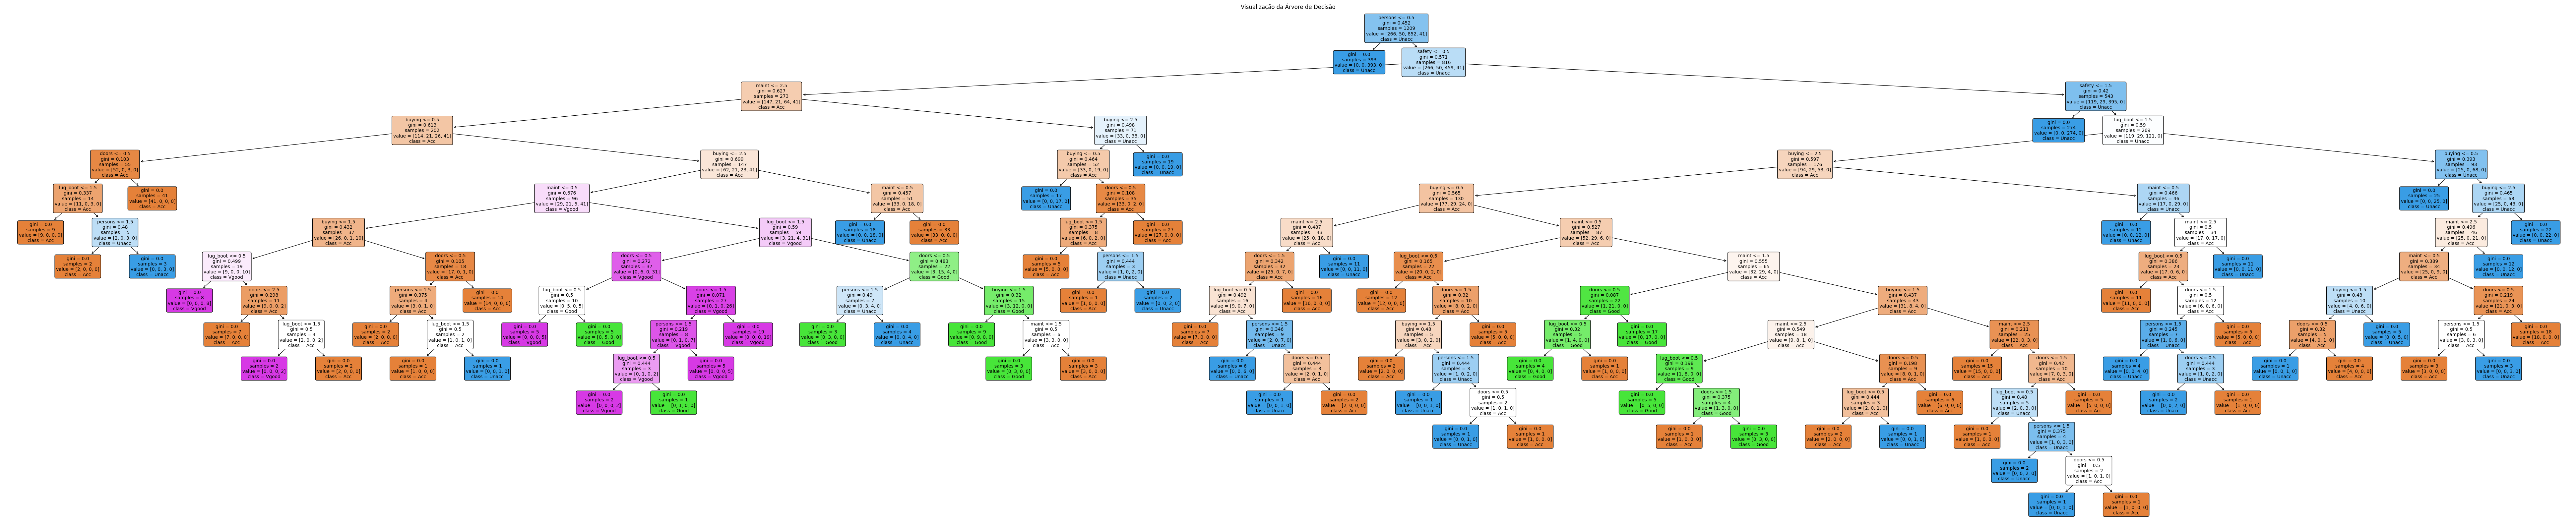

In [224]:
# Configuração para a visualização da Árvore de Decisão
plt.figure(figsize=(100,20))
plot_tree(decision_tree_model, 
          feature_names=X.columns, 
          class_names=class_mapping, 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Visualização da Árvore de Decisão")
plt.show()


Conclusão: A árvore de decisão ilustrada é um modelo utilizado para classificar dados da classificação de carros com base em várias características. A estrutura da árvore começa com um nó raiz no topo, dividindo-se por níveis de nós de decisão representados por retângulos, até chegar às elipses, que são as folhas onde as previsões finais são feitas. Cada nó divide o conjunto de dados com base em um atributo e um valor de corte específicos, sugerindo quais características (como 'safety', 'persons') são importantes para a classificação dos carros. Os nós e folhas são coloridos de acordo com a classe majoritária que representam, oferecendo uma representação visual de como o modelo discrimina entre diferentes categorias.

A profundidade da árvore reflete sua complexidade e capacidade de capturar detalhes nos dados; no entanto, uma árvore muito profunda pode sofrer de overfitting, significando que ela pode não generalizar bem para novos dados. Cada nó detalha o critério de divisão e a quantidade de amostras afetadas, fornecendo transparência nas decisões do modelo e permitindo insights sobre quais fatores são mais influentes na determinação da classificação dos carros. A análise dessa árvore pode ajudar na compreensão das decisões do modelo e na identificação das características mais significativas para a classificação no conjunto de dados específico.